<a href="https://colab.research.google.com/github/winduptu/colab_notebook/blob/main/Airline_Customer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GET DATA**

https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

In [1]:
import gdown
#data cleansing
import pandas as pd
import numpy as np
import datetime as dt # library ที่ใช้ในการจัดการวันที่

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning library
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import Normalizer,StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [2]:
#ohe function
def ohe_function(df, columns):
  ohe = OneHotEncoder()
  ohe.fit_transform(df[[columns]]).toarray()
  matrix = ohe.fit_transform(df[[columns]]).toarray()
  column_names = ohe.get_feature_names_out()  
  for i in range(len(matrix.T)):
            df[column_names[i]]= matrix.T[i]
  df = df.drop(columns=[columns])
  
#label encoder function
def le_function(df,columns):
  from sklearn import preprocessing
  le = preprocessing.LabelEncoder()
  df[columns] = le.fit_transform(df[columns])

#รวมไฟล์
def file_merge(df):
  result = pd.merge(df, holidays_event,how="left", on=["date"])
  result2 = pd.merge(result, stores,how="left",  on=["store_nbr"])
  result4 = pd.merge(result2, oil,how="left",  on=["date"])
  return result4

In [3]:
df = pd.read_csv('https://drive.google.com/uc?id=1xtYNz2dv5uNcErQJ_90tJwMcCCdkTGLq')

In [4]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [5]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [7]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

**VISUALIZE DATA**

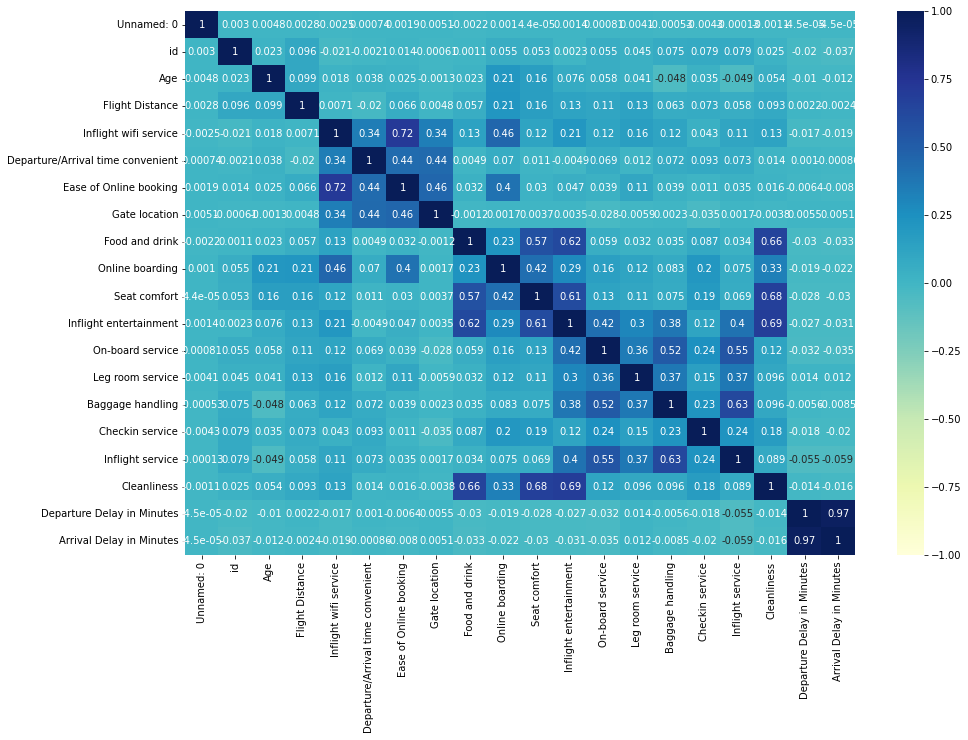

In [8]:
#correlation matrix
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


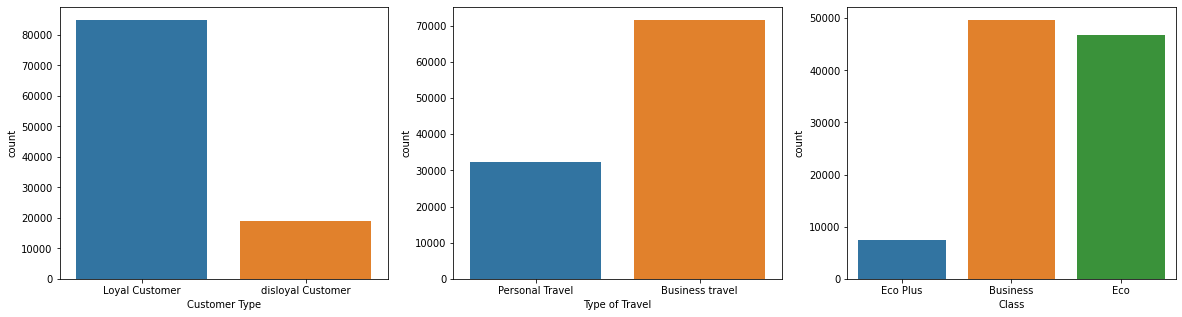

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.countplot(df['Customer Type'],ax=ax[0],)
sns.countplot(df['Type of Travel'],ax=ax[1])
sns.countplot(df['Class'],ax=ax[2])
plt.show()

**DATA CLEANSING & FEATURE EXTRACTION**

In [10]:
#Label Encoding
le_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
for i in le_cols:
  le_function(df, i)

df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,0,13,1,2,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,1,1,25,0,0,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,0,0,26,0,0,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,0,0,25,0,0,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,1,0,61,0,0,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,0,1,23,0,1,192,2,1,...,2,3,1,4,2,3,2,3,0.0,0
103900,103900,73097,1,0,49,0,0,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,103901,68825,1,1,30,0,0,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,0
103902,103902,54173,0,1,22,0,1,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,0


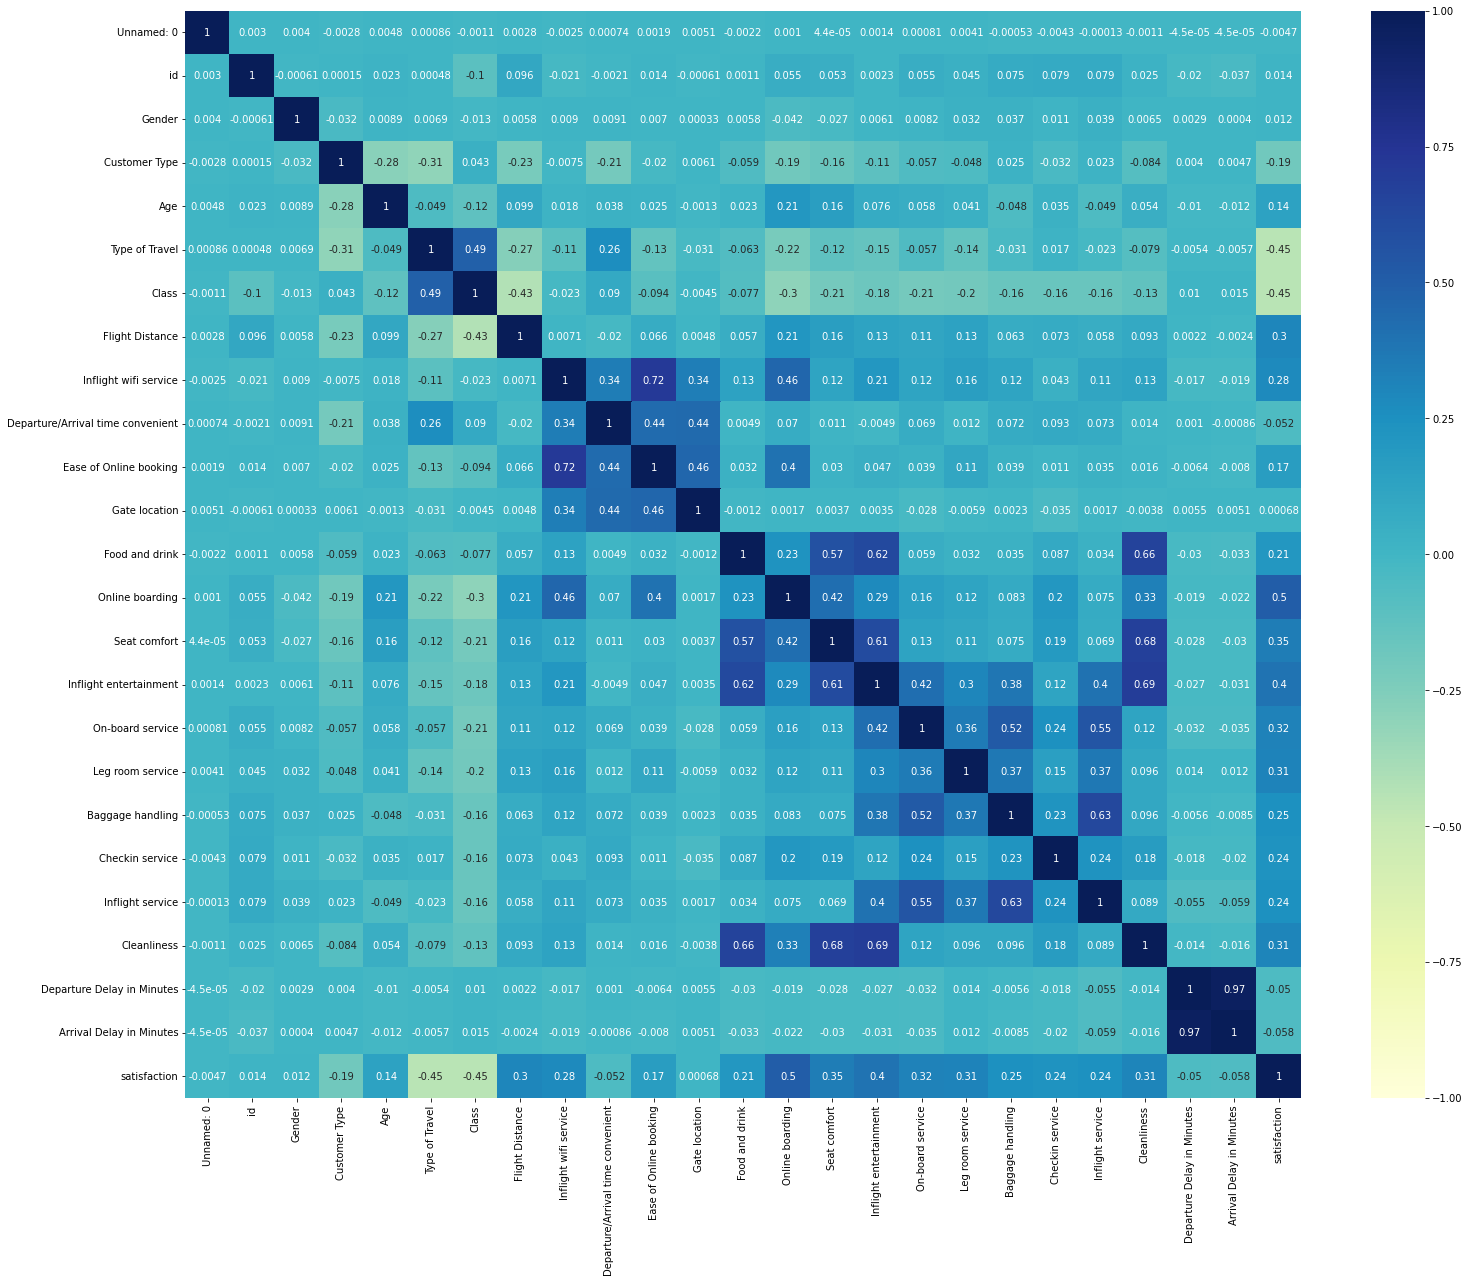

In [11]:
#correlation matrix
plt.figure(figsize=(25, 20))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


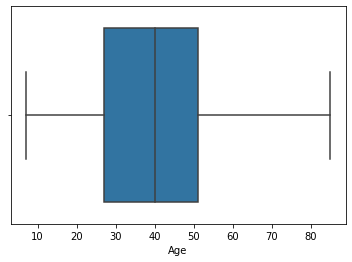

In [12]:
sns.boxplot(df['Age'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


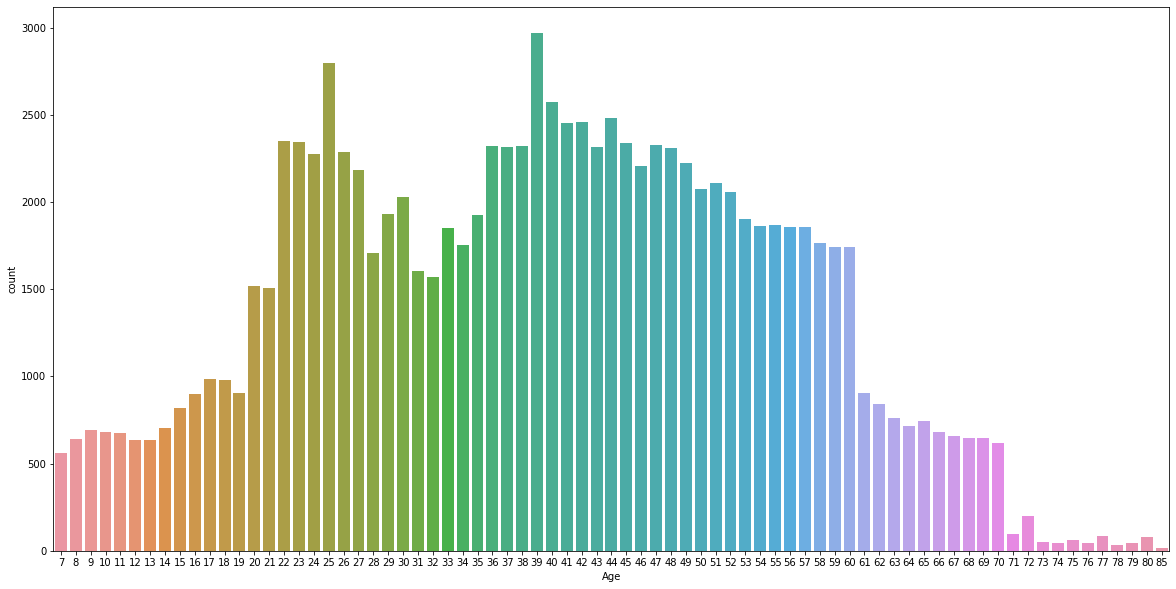

In [13]:
plt.figure(figsize=(20, 10))
sns.countplot(df['Age'])
plt.show()

In [14]:
df.fillna(0, inplace=True)
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

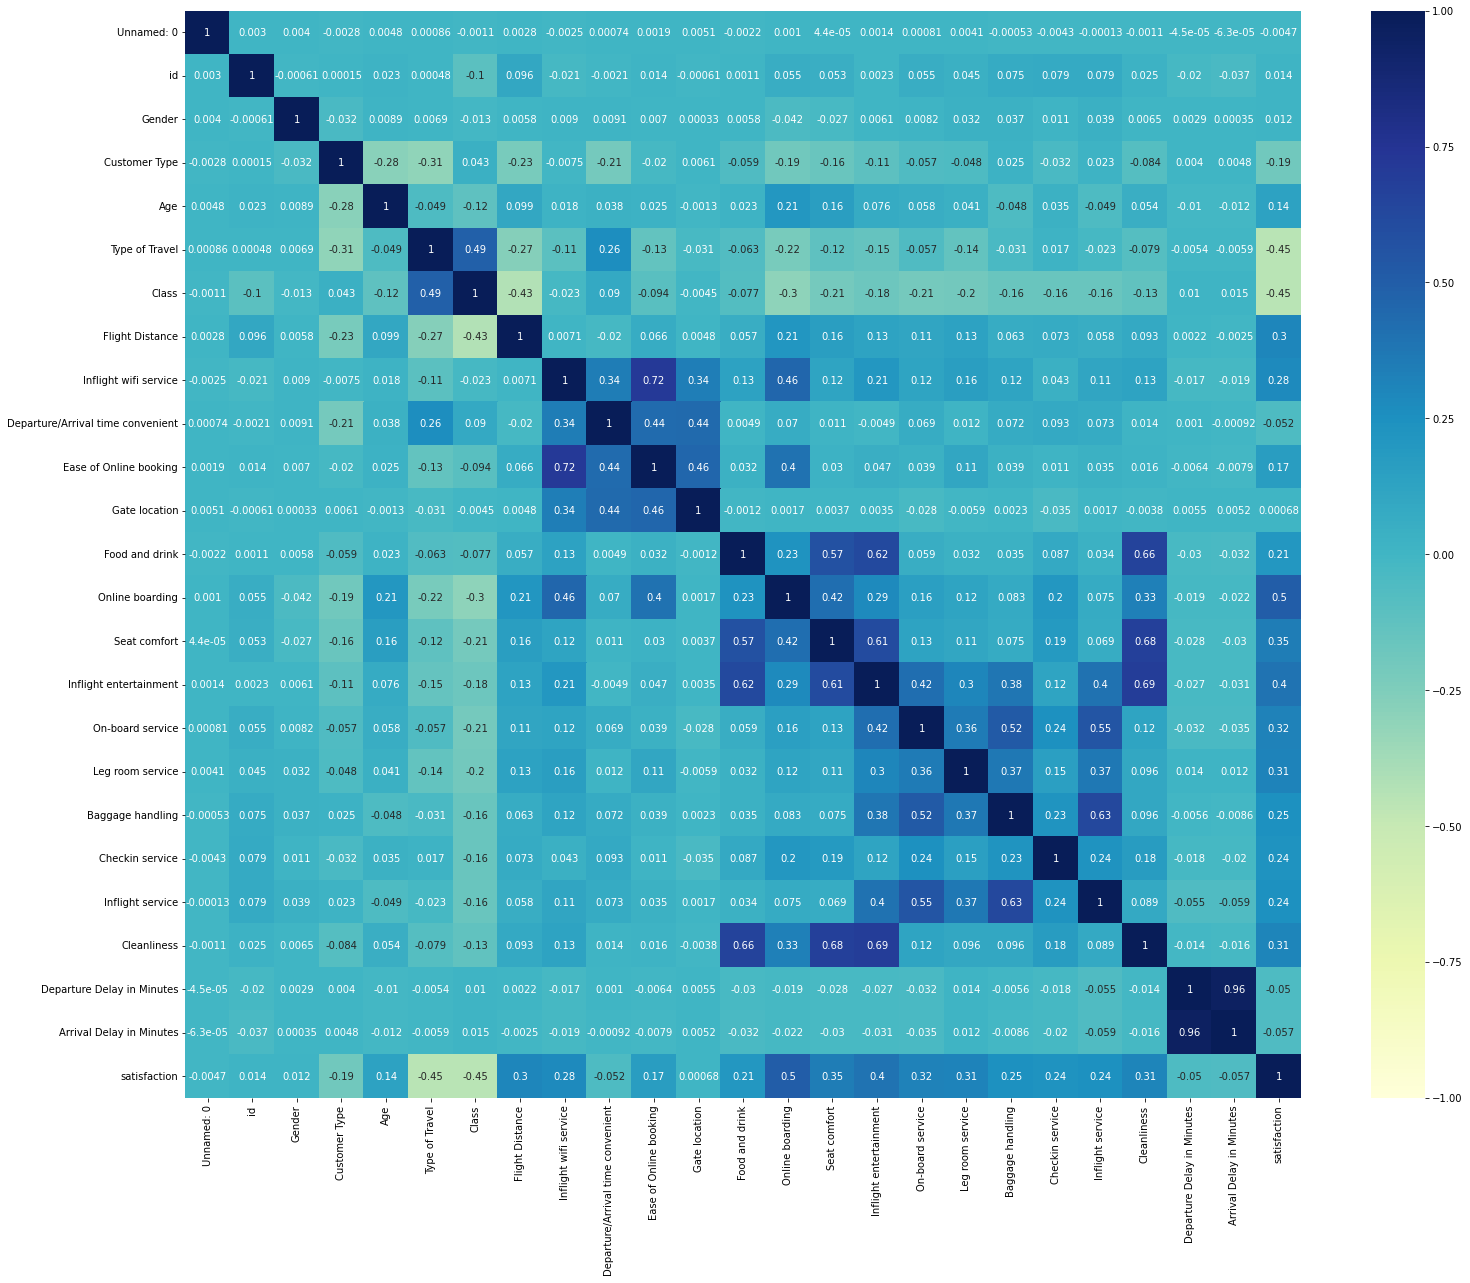

In [15]:
#เช็คค่า corr หลังจากทำ Label Encoding
plt.figure(figsize=(25, 20))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')

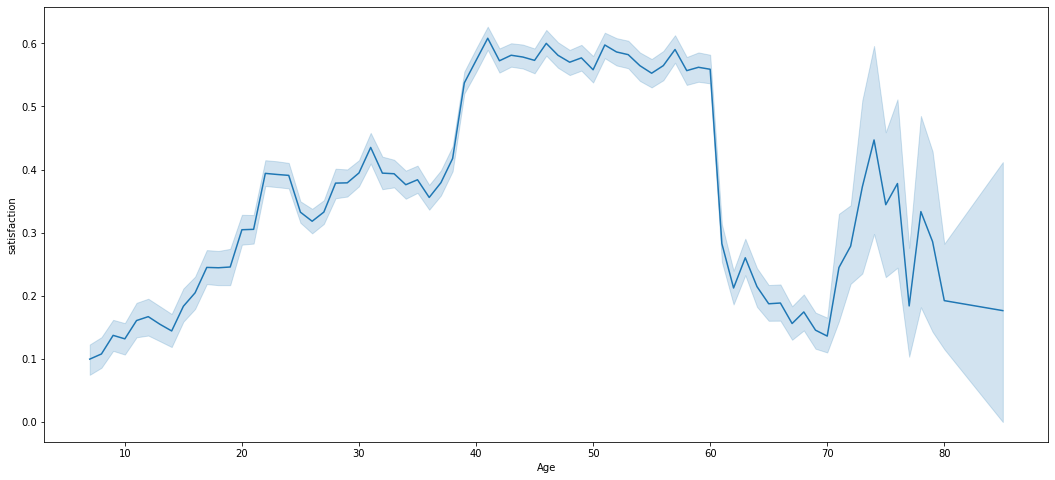

In [16]:
#เช็คความสัมพันธ์ระหว่างช่วงอายุกับความพึงพอใจ
plt.figure(figsize=(18, 8))
sns.lineplot(data=df, x='Age', y='satisfaction')

In [17]:
#ทำ Standard Scaling
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns= df.columns )
scaled_df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,-1.732034,0.140077,1.015031,-0.472767,-1.745279,1.490614,2.264618,-0.731539,0.203579,0.616172,...,1.231704,0.479403,-0.266840,0.311769,0.549799,1.156436,1.305870,0.266393,0.074169,-0.874473
1,-1.732001,-1.598276,1.015031,2.115208,-0.951360,-0.670865,-0.957054,-0.957184,0.203579,-0.695245,...,-1.769081,-1.849161,1.253380,-0.535045,-1.821012,0.305848,-1.742292,-0.361375,-0.236313,-0.874473
2,-1.731967,1.203935,-0.985192,-0.472767,-0.885200,-0.670865,-0.957054,-0.047584,-0.549533,-0.695245,...,1.231704,0.479403,-0.266840,0.311769,0.549799,0.305848,1.305870,-0.387532,-0.391554,1.143545
3,-1.731934,-1.091678,-0.985192,-0.472767,-0.951360,-0.670865,-0.957054,-0.629246,-0.549533,1.271880,...,-1.018885,-1.072973,1.253380,-0.535045,-1.821012,0.305848,-0.980251,-0.099805,-0.158692,-0.874473
4,-1.731901,1.451402,1.015031,-0.472767,1.430397,-0.670865,-0.957054,-0.978244,0.203579,-0.039537,...,-0.268688,-0.296785,0.493270,0.311769,-0.240472,-0.544740,-0.218211,-0.387532,-0.391554,1.143545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1.731901,0.780671,-0.985192,2.115208,-1.083680,-0.670865,0.653782,-1.000307,-0.549533,-1.350954,...,-1.018885,-0.296785,-1.787061,0.311769,-1.030742,-0.544740,-0.980251,-0.309061,-0.391554,-0.874473
103900,1.731934,0.218153,1.015031,-0.472767,0.636478,-0.670865,-0.957054,1.160869,0.956691,0.616172,...,1.231704,1.255590,1.253380,1.158582,1.340069,1.156436,0.543829,-0.387532,-0.391554,1.143545
103901,1.731967,0.104122,1.015031,2.115208,-0.620561,-0.670865,-0.957054,0.807860,-1.302646,-1.350954,...,0.481508,-0.296785,-1.026951,0.311769,1.340069,1.156436,0.543829,-0.204433,-0.029325,-0.874473
103902,1.732001,-0.286977,-0.985192,2.115208,-1.149840,-0.670865,0.653782,-0.189991,-1.302646,-1.350954,...,-1.769081,0.479403,1.253380,-2.228672,1.340069,0.305848,-1.742292,-0.387532,-0.391554,-0.874473


**MACHINE LEARNING**

Elbow Method to determine the number of clusters to be formed:


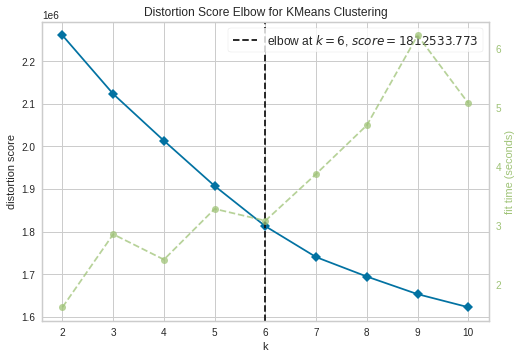

In [18]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(scaled_df)
Elbow_M.show()

In [19]:
#Initiating the Agglomerative Clustering model 
km = KMeans(n_clusters=6, random_state=0)
# fit model and predict clusters
yhat_km = km.fit_predict(scaled_df)
scaled_df["Clusters"] = yhat_km
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_km

In [20]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Clusters
0,0,70172,1,0,13,1,2,460,3,4,...,4,3,4,4,5,5,25,18.0,0,1
1,1,5047,1,1,25,0,0,235,3,2,...,1,5,3,1,4,1,1,6.0,0,5
2,2,110028,0,0,26,0,0,1142,2,2,...,4,3,4,4,4,5,0,0.0,1,3
3,3,24026,0,0,25,0,0,562,2,5,...,2,5,3,1,4,2,11,9.0,0,5
4,4,119299,1,0,61,0,0,214,3,3,...,3,4,4,3,3,3,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,0,1,23,0,1,192,2,1,...,3,1,4,2,3,2,3,0.0,0,5
103900,103900,73097,1,0,49,0,0,2347,4,4,...,5,5,5,5,5,4,0,0.0,1,0
103901,103901,68825,1,1,30,0,0,1995,1,1,...,3,2,4,5,5,4,7,14.0,0,1
103902,103902,54173,0,1,22,0,1,1000,1,1,...,4,5,1,5,4,1,0,0.0,0,5


**EVALUATION**

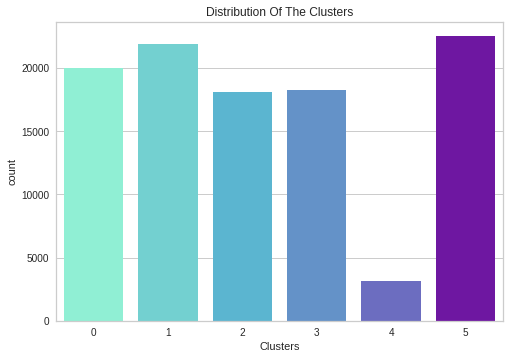

In [21]:
palettes = ['#80ffdb', '#64dfdf', '#48bfe3', '#5390d9', '#5e60ce', '#7400b8' ]
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"], palette=palettes)
pl.set_title("Distribution Of The Clusters")
plt.show()

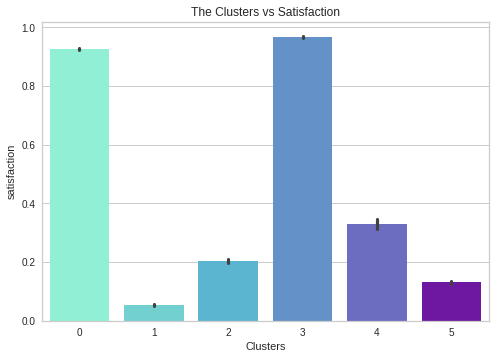

In [22]:
pl = sns.barplot(data = df,x=df["Clusters"], y=df["satisfaction"], palette=palettes)
pl.set_title("The Clusters vs Satisfaction")
plt.show()

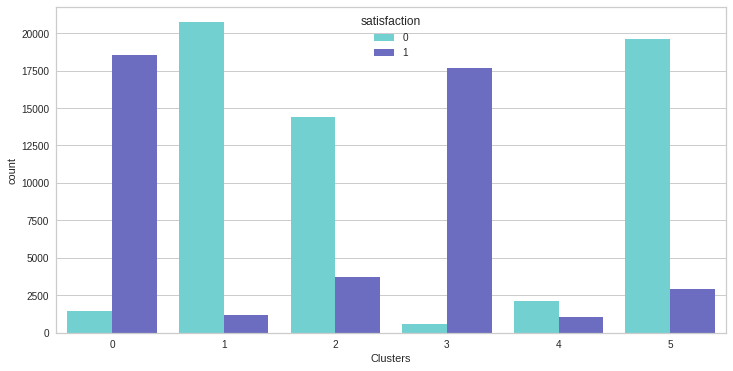

In [23]:
palettes_2 = ['#64dfdf','#5e60ce' ]

plt.figure(figsize = (12,6))
pl = sns.countplot(x=df["Clusters"],hue=df["satisfaction"], palette=palettes_2)

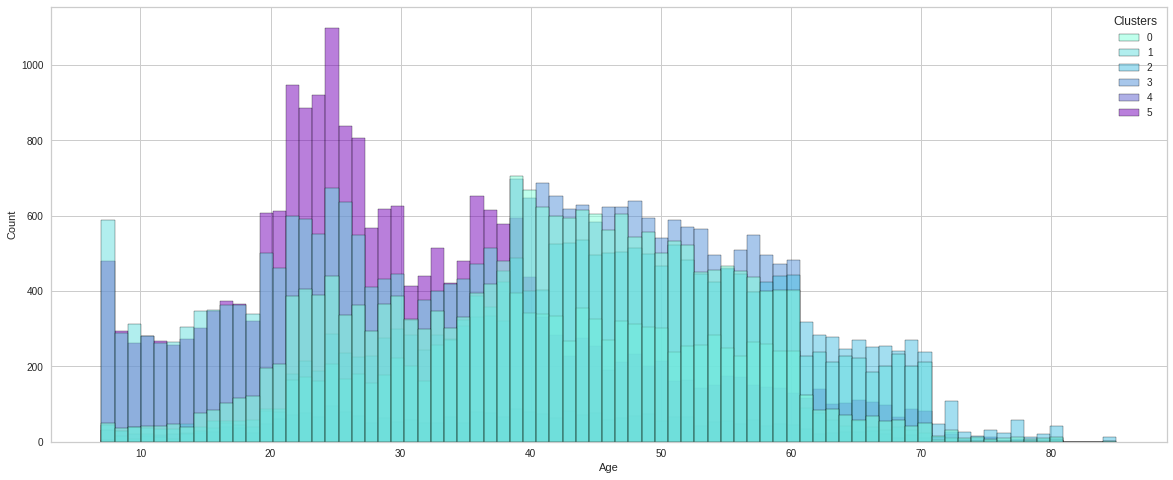

In [27]:
palettes = ['#80ffdb', '#64dfdf', '#48bfe3', '#5390d9', '#5e60ce', '#7400b8' ]
pl.set_title("The Clusters by Age")
plt.figure(figsize = (20,8))
sns.histplot(data=df, x="Age", hue="Clusters", palette=palettes)

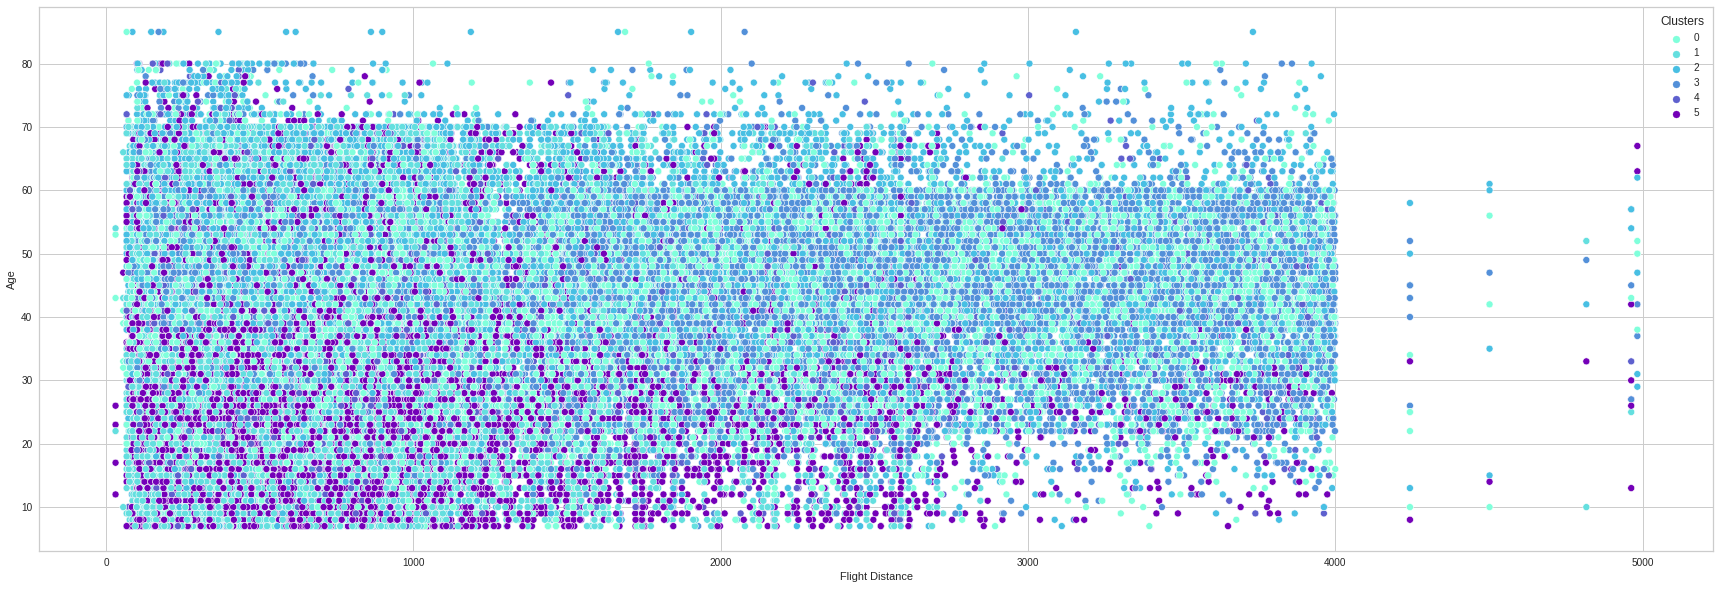

In [28]:
palettes = ['#80ffdb', '#64dfdf', '#48bfe3', '#5390d9', '#5e60ce', '#7400b8' ]
pl.set_title("Flight vs Age")
plt.figure(figsize = (30,10))
sns.scatterplot(data=df, y="Age", x="Flight Distance", hue="Clusters", palette=palettes)